In [1]:
# Import statements
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


/Users/yenori/anaconda3/envs/mydev/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/var/folders/cz/_pyz_5qn69155q4_bc51whp00000gn/T/ipykernel_45706/45807504.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Create reference to CSV file
csv_path = Path("Project-_4/stroke_data.csv")


#Import the csv into a pandas DataFrame
stroke_data = pd.read_csv('stroke_data.csv')

In [3]:
# Check for null values in stroke_data
null_values = stroke_data.isnull().sum()

display(null_values)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
#Drop null rows
stroke_reduced_columns = stroke_data[["id", "gender", "age", "hypertension", "heart_disease", "ever_married", 
                                      "work_type", "Residence_type","avg_glucose_level", "bmi", "smoking_status", 
                                      "stroke"]]
stroke_reduced_columns

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
stroke_reduced_columns.count()

id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64

In [6]:
# Check for null values in stroke_data
null_values = stroke_data.isnull().sum()

display(null_values)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
#Drop null rows
no_null_stroke_data = stroke_reduced_columns.dropna(how='any')

In [8]:
#verify counts
no_null_stroke_data.count()

id                   4909
gender               4909
age                  4909
hypertension         4909
heart_disease        4909
ever_married         4909
work_type            4909
Residence_type       4909
avg_glucose_level    4909
bmi                  4909
smoking_status       4909
stroke               4909
dtype: int64

In [9]:
# Check for duplicate IDs
duplicate_ids = stroke_data['id'].duplicated().sum()

display(duplicate_ids)

0

In [10]:
# Count the number of females and males who had a stroke
female_stroke_count = stroke_data[(stroke_data['gender'] == 'Female') & (stroke_data['stroke'] == 1)].shape[0]
male_stroke_count = stroke_data[(stroke_data['gender'] == 'Male') & (stroke_data['stroke'] == 1)].shape[0]

print("Number of females who had a stroke:", female_stroke_count)
print("Number of males who had a stroke:", male_stroke_count)

Number of females who had a stroke: 141
Number of males who had a stroke: 108


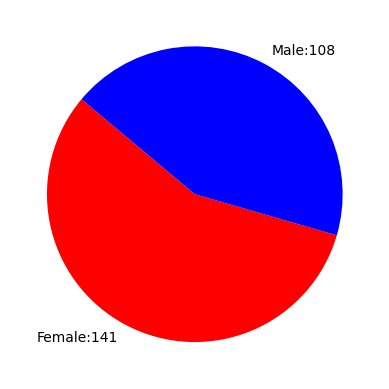

In [11]:
labels = ["Female:141", "Male:108"]
sizes = [141, 108]
colors = ["red", "blue"]
plt.pie(sizes, labels=labels, colors=colors, startangle=140)
plt.show()

In [12]:
count = stroke_data["smoking_status"].value_counts()
count

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [13]:
# Drop rows where 'smoking_status' is 'Unknown'
# stroke_data = stroke_data[stroke_data['smoking_status'] != 'Unknown']

# Now 'Unknown' rows are dropped from the dataframe

# print(stroke_data)

In [14]:
count = stroke_data["smoking_status"].value_counts()
count

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [15]:
#Create path to cleaned data csv
cleaned_csv_path = Path("Project-_4/no_null_stroke_data.csv")

#Import the csv into a pandas DataFrame
cleaned_stroke_data = pd.read_csv('no_null_stroke_data.csv')

cleaned_stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4904,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4905,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4906,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4907,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [16]:
# import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

2024-03-07 19:24:43.660255: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies = pd.get_dummies(cleaned_stroke_data)
dummies

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,False,True,False,...,False,True,False,False,False,True,False,True,False,False
1,31112,80.0,0,1,105.92,32.5,1,False,True,False,...,False,True,False,False,True,False,False,False,True,False
2,60182,49.0,0,0,171.23,34.4,1,True,False,False,...,False,True,False,False,False,True,False,False,False,True
3,1665,79.0,1,0,174.12,24.0,1,True,False,False,...,False,False,True,False,True,False,False,False,True,False
4,56669,81.0,0,0,186.21,29.0,1,False,True,False,...,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,14180,13.0,0,0,103.08,18.6,0,True,False,False,...,False,False,False,True,True,False,True,False,False,False
4905,44873,81.0,0,0,125.20,40.0,0,True,False,False,...,False,False,True,False,False,True,False,False,True,False
4906,19723,35.0,0,0,82.99,30.6,0,True,False,False,...,False,False,True,False,True,False,False,False,True,False
4907,37544,51.0,0,0,166.29,25.6,0,False,True,False,...,False,True,False,False,True,False,False,True,False,False


In [18]:
# Split our preprocessed data into our features and target arrays
y = dummies.stroke

# Split the preprocessed data into a training and testing dataset
X = dummies.drop(columns = 'stroke')

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state= 1)

In [19]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train_scaled[0])


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units = 80, input_dim= input_features, activation ='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units = 30, activation ='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units = 1, activation ='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                1840      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 4301 (16.80 KB)
Trainable params: 4301 (16.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

In [22]:
# Train the model
nn.fit(X_train_scaled,y_train, epochs = 100)

Epoch 1/100
116/116 [==============================] - 6s 22ms/step - loss: 0.2284 - accuracy: 0.9419
Epoch 2/100
116/116 [==============================] - 1s 11ms/step - loss: 0.1455 - accuracy: 0.9590
Epoch 3/100
116/116 [==============================] - 2s 17ms/step - loss: 0.1404 - accuracy: 0.9590
Epoch 4/100
116/116 [==============================] - 1s 12ms/step - loss: 0.1354 - accuracy: 0.9593
Epoch 5/100
116/116 [==============================] - 2s 15ms/step - loss: 0.1311 - accuracy: 0.9601
Epoch 6/100
116/116 [==============================] - 2s 13ms/step - loss: 0.1287 - accuracy: 0.9595
Epoch 7/100
116/116 [==============================] - 1s 11ms/step - loss: 0.1277 - accuracy: 0.9598
Epoch 8/100
116/116 [==============================] - 1s 13ms/step - loss: 0.1264 - accuracy: 0.9598
Epoch 9/100
116/116 [==============================] - 1s 12ms/step - loss: 0.1243 - accuracy: 0.9593
Epoch 10/100
116/116 [==============================] - 1s 8ms/step - loss: 0.1213

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

39/39 - 1s - loss: 0.4633 - accuracy: 0.9300 - 797ms/epoch - 20ms/step
Loss: 0.46325212717056274, Accuracy: 0.9299674034118652


In [27]:
# Adding a decision tree model

# Importing dependencies 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 'X_train_scaled', 'X_test_scaled', 'y_train', 'y_test' are already defined 
# from the linear regression model

# Define and fit the new decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluating the model
print("Decision Tree Model Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

cm = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(cm)

Decision Tree Model Accuracy: 0.9136807817589576
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1170
           1       0.10      0.10      0.10        58

    accuracy                           0.91      1228
   macro avg       0.53      0.53      0.53      1228
weighted avg       0.92      0.91      0.91      1228

Confusion Matrix:
[[1116   54]
 [  52    6]]


In [28]:
# Optimize the decision tree model by adjusting the class weight
# This will make the model pay more attention to class '1', patients with strokes,  
# which the model has a lower precision, recall, and f1-score for.

# Define and fit the optimized decision tree model
opt_dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
opt_dt_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_dt = opt_dt_model.predict(X_test_scaled)

# Evaluating the model
print("Decision Tree Model Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

cm = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(cm)

Decision Tree Model Accuracy: 0.9210097719869706
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1170
           1       0.22      0.26      0.24        58

    accuracy                           0.92      1228
   macro avg       0.59      0.61      0.60      1228
weighted avg       0.93      0.92      0.92      1228

Confusion Matrix:
[[1116   54]
 [  43   15]]


In [30]:
# Use Grid Search to find the best parameters for hyperparameter tuning
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [10, 20, 30],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Initialize the classifier
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split

In [32]:
from sklearn.tree import DecisionTreeClassifier

# Best parameters found from GridSearchCV
best_params = {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}

# Creating the model with the best parameters
optimal_dt_model = DecisionTreeClassifier(max_depth=30, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, random_state=42)

# Fitting the model
optimal_dt_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = optimal_dt_model.predict(X_test_scaled)

# You can now evaluate the model as you see fit, for example:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9226384364820847
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1170
           1       0.18      0.17      0.17        58

    accuracy                           0.92      1228
   macro avg       0.57      0.57      0.57      1228
weighted avg       0.92      0.92      0.92      1228

Confusion Matrix:
[[1116   54]
 [  43   15]]


In [33]:
# Use the Syntheris Minority Over-sampling Technique to oversample the minority class
# We may have a lower accuracy score but the confusion matrix will improve

from imblearn.over_sampling import SMOTE
from collections import Counter

# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Resample the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Checking the class distribution after applying SMOTE
print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_train_smote))

optimal_dt_model.fit(X_train_smote, y_train_smote)
y_pred_smote = optimal_dt_model.predict(X_test_scaled)

Original dataset shape Counter({0: 3530, 1: 151})
Resampled dataset shape Counter({0: 3530, 1: 3530})


/Users/yenori/anaconda3/envs/mydev/lib/python3.11/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [34]:
# Retrain the decision tree model
optimal_dt_model.fit(X_train_smote, y_train_smote)

# Make the predictions
y_pred_opt_smote = optimal_dt_model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_opt_smote))
print(classification_report(y_test, y_pred_opt_smote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_opt_smote))

Accuracy: 0.8876221498371335
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1170
           1       0.09      0.16      0.12        58

    accuracy                           0.89      1228
   macro avg       0.52      0.54      0.53      1228
weighted avg       0.92      0.89      0.90      1228

Confusion Matrix:
 [[1081   89]
 [  49    9]]


In [36]:
# Undersample the majority class
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train_scaled, y_train)

# Fit and evaluate
dt_model_rus = DecisionTreeClassifier(max_depth=30, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, random_state=42)
dt_model_rus.fit(X_resampled, y_resampled)

y_pred_rus = dt_model_rus.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred_rus))
print(classification_report(y_test, y_pred_rus))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rus))

Accuracy: 0.6986970684039088
              precision    recall  f1-score   support

           0       0.97      0.70      0.82      1170
           1       0.09      0.62      0.16        58

    accuracy                           0.70      1228
   macro avg       0.53      0.66      0.49      1228
weighted avg       0.93      0.70      0.79      1228

Confusion Matrix:
 [[822 348]
 [ 22  36]]
